<a href="https://colab.research.google.com/github/ds6332/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The objective is to detect Fake news.

Data set used: https://www.kaggle.com/c/fake-news/data?select=train.csv

In [16]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [40]:

import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [29]:
#import DataPrep
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

###Dataset:https://github.com/ds6332/ML-Project

In [17]:
test_filename = './test.csv'
train_filename = './train.csv'
valid_filename = './validation.csv'

In [18]:
train_news = pd.read_csv(train_filename,encoding='cp1252')
test_news = pd.read_csv(test_filename,encoding='cp1252')
valid_news = pd.read_csv(valid_filename,encoding='cp1252')


#Extracting just the statements and the label

In [19]:
train_news = train_news.loc[:,['Statement','Label']]
test_news = test_news.loc[:,['Statement','Label']]
valid_news = valid_news.loc[:,['Statement','Label']]

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


Encode labels to 0s and 1s.

In [21]:
train_news['Label'] = le.fit_transform(train_news['Label'])
test_news['Label'] = le.fit_transform(test_news['Label'])
valid_news['Label'] = le.fit_transform(valid_news['Label'])


In [81]:
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))
    

def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')

#Distribution of Data

###class 1:Fake
###class 0:Not Fake

Train set


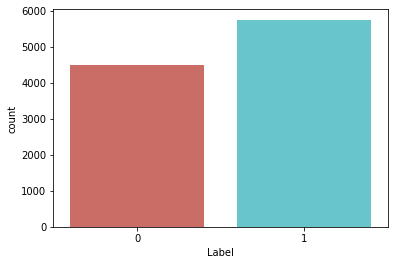

In [82]:
create_distribution(train_news)


Test Set

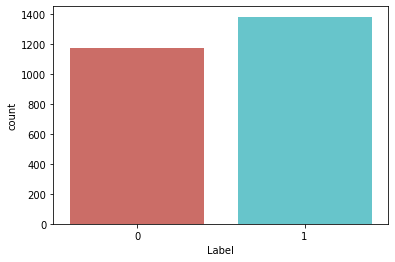

In [83]:
create_distribution(test_news)


Validation set

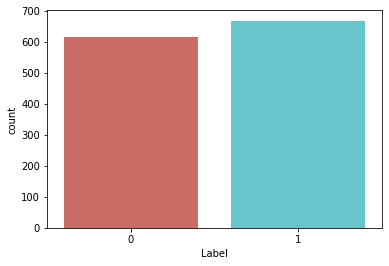

In [84]:
create_distribution(valid_news)

In [207]:
def data_Check():
    
    
    train_news.isnull().sum()
    train_news.info()
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()

In [25]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [26]:
#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

#creating ngrams

In [27]:

#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [28]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [30]:

countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)

print(countV)
print(train_count)

CountVectorizer()
  (0, 9614)	1
  (0, 10922)	1
  (0, 1011)	1
  (0, 6592)	1
  (0, 8323)	1
  (0, 5074)	1
  (0, 10643)	1
  (0, 10970)	1
  (0, 11230)	1
  (0, 584)	1
  (0, 7675)	1
  (0, 3240)	1
  (1, 10922)	1
  (1, 11867)	2
  (1, 3396)	1
  (1, 3147)	1
  (1, 7619)	1
  (1, 2440)	1
  (1, 10362)	1
  (1, 6008)	1
  (1, 10363)	2
  (1, 7367)	1
  (1, 4820)	1
  (1, 11072)	1
  (1, 7621)	1
  :	:
  (10235, 10922)	1
  (10235, 7619)	2
  (10235, 11044)	2
  (10235, 5224)	1
  (10235, 7775)	1
  (10235, 7771)	1
  (10235, 1126)	1
  (10235, 12084)	2
  (10235, 6281)	1
  (10235, 6556)	1
  (10235, 10947)	1
  (10235, 10938)	1
  (10235, 3271)	1
  (10235, 12091)	1
  (10235, 11594)	2
  (10235, 767)	1
  (10235, 2532)	1
  (10235, 11556)	1
  (10235, 2513)	1
  (10235, 10594)	1
  (10235, 8939)	1
  (10235, 10852)	1
  (10235, 3950)	1
  (10235, 10529)	1
  (10235, 6805)	1


In [31]:
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

https://medium.com/acing-ai/what-is-tf-idf-in-feature-engineering-7f1ba81982bd#:~:text=It%20has%20two%20parts%3A%20Term,in%20the%20document%20or%20dataset.&text=The%20second%20part%20is%20%E2%80%94%20inverse,word%20is%20to%20the%20document.

In [32]:

#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

More content to read: https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba

In [33]:
#POS Tagging
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train_news['Statement']
 
print(training_sentences)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10231    There are a larger number of shark attacks in ...
10232    Democrats have now become the party of the [At...
10233    Says an alternative to Social Security that op...
10234    On lifting the U.S. Cuban embargo and allowing...
10235    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10236, dtype: object


In [34]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

In [36]:
    
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
  return [w for w, t in tagged_sentence]

In [205]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


#Classification

#first we will use bag of words techniques

#naive bayes classifier

In [42]:
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])
train_news = train_news.fillna("")
nb_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_nb = nb_pipeline.predict(test_news['Statement'])
np.mean(predicted_nb == test_news['Label'])




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5994507650058847

#logistic regression

In [85]:

logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_LogR = logR_pipeline.predict(test_news['Statement'])
np.mean(predicted_LogR == test_news['Label'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5994507650058847

#random forest classifier

In [43]:

random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['Statement'],train_news['Label'])
predicted_rf = random_forest.predict(test_news['Statement'])
np.mean(predicted_rf == test_news['Label'])

0.6245586504511573

In [44]:
def build_valid(classifier):
    
        train_text = train_news.loc[:,'Statement'] 
        train_y = train_news.loc[:,'Label']
    
        valid_text = valid_news.loc[:,'Statement']
        valid_y = valid_news.loc[:,'Label']
  
        classifier.fit(train_text,train_y)
        predictions = pd.Series(classifier.predict(valid_text))

        scores = []
        score = f1_score(valid_y,predictions,average='micro')
        scores.append(score)
        valid_y = valid_y.fillna("")
        predictions = predictions.fillna("")    
        cm = confusion_matrix(valid_y,predictions)
        print('Total statements classified:', len(train_news))
        print('Accuracy (%) :', (sum(scores)/len(scores))*100)
        print(cm)
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Negative','Positive']
        plt.title('Fake News Detection')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        s = [['TN','FP'], ['FN', 'TP']]
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(cm[i][j]))
        plt.show()

    


Total statements classified: 10236
Accuracy (%) : 61.059190031152646
[[317 299]
 [201 467]]


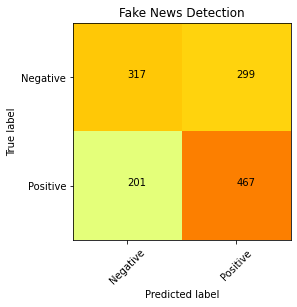

Total statements classified: 10236
Accuracy (%) : 58.8006230529595
[[322 294]
 [235 433]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


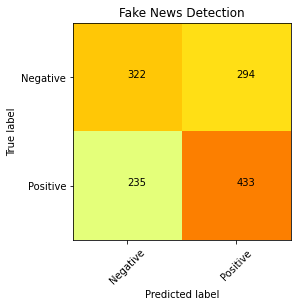

Total statements classified: 10236
Accuracy (%) : 63.862928348909655
[[277 339]
 [125 543]]


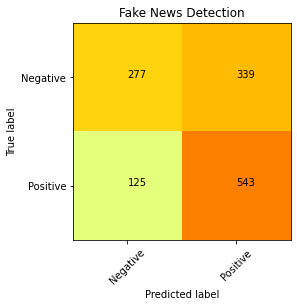

In [45]:

build_valid(nb_pipeline)
build_valid(logR_pipeline)
build_valid(random_forest)

##Now using n-grams

In [51]:

#naive-bayes classifier
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])


#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])

In [53]:
nb_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_nb_ngram == test_news['Label'])



0.5931737936445665

In [54]:
logR_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_LogR_ngram == test_news['Label'])

0.6210278540604158

In [55]:
random_forest_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['Statement'])
np.mean(predicted_rf_ngram == test_news['Label'])

0.6096508434680267

Total statements classified: 10236
Accuracy (%) : 58.41121495327103
[[129 487]
 [ 47 621]]


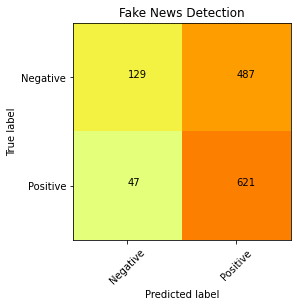

Total statements classified: 10236
Accuracy (%) : 62.22741433021807
[[257 359]
 [126 542]]


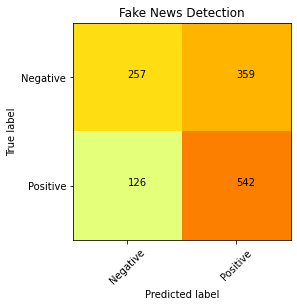

Total statements classified: 10236
Accuracy (%) : 60.046728971962615
[[312 304]
 [209 459]]


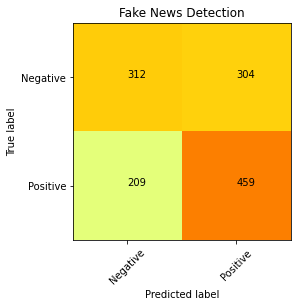

In [48]:

build_valid(nb_pipeline_ngram)
build_valid(logR_pipeline_ngram)
build_valid(random_forest_ngram)

printing classification report. Compare the performance between each 3 different classifiers and between bag of words model and n-gram model.

In [89]:

print('Naive Bayes\n'+'Bag of words\n'+classification_report(test_news['Label'], predicted_nb)+'\nN-gram\n'+classification_report(test_news['Label'], predicted_nb_ngram))
print('Logistic Regression\n'+'Bag of words\n'+classification_report(test_news['Label'], predicted_LogR)+'\nN-gram\n'+classification_report(test_news['Label'], predicted_LogR_ngram))
print('Random Forest\n'+'Bag of words\n'+classification_report(test_news['Label'], predicted_rf)+'\nN-gram\n'+classification_report(test_news['Label'], predicted_rf_ngram))



test_news['Label'].shape


Naive Bayes
Bag of words
              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1169
           1       0.62      0.70      0.66      1380

    accuracy                           0.61      2549
   macro avg       0.60      0.60      0.60      2549
weighted avg       0.60      0.61      0.60      2549

N-gram
              precision    recall  f1-score   support

           0       0.71      0.19      0.30      1169
           1       0.58      0.94      0.71      1380

    accuracy                           0.59      2549
   macro avg       0.65      0.56      0.51      2549
weighted avg       0.64      0.59      0.52      2549

Logistic Regression
Bag of words
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1169
           1       0.62      0.67      0.64      1380

    accuracy                           0.60      2549
   macro avg       0.60      0.59      0.59      2549
weighted 

(2549,)

Random Forest CLassifier : https://towardsdatascience.com/understanding-random-forest-58381e0602d2

#As extra work,

#Tried Neural Network Based on this paper. Didn't get expected output, and left for future learning. https://arxiv.org/pdf/1708.01967.pdf

#Also tried LSTM as an extension of this paper, didnt get expected results. 

#Trying a neural network to classify

made errors processing the data. Due to lack of time, not resolving the bugs.

In [4]:
import numpy as np
import re
import string
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
from gensim import utils
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
#from getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#import scikitplot.plotters as skplt
from sklearn.metrics import confusion_matrix
def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return (text)


def cleanup(text):
    text = textClean(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text


def constructLabeledSentences(data):
    sentences = []
    for index, row in data.iteritems():
        sentences.append(LabeledSentence(utils.to_unicode(row).split(), ['Text' + '_%s' % str(index)]))
    return sentences
def getEmbeddings(path,vector_dimension=300):
    data = pd.read_csv(path,encoding = 'utf-8')
    
    data=data.dropna(how='any')

    for i in range(len(data)):
        data.loc[i, 'Statement'] = cleanup(data.loc[i,'Statement'])

    x = constructLabeledSentences(data['Statement'])
    y = data['Label'].values

    text_model = Doc2Vec(min_count=1, window=5, vector_size=vector_dimension, sample=1e-4, negative=5, workers=7, epochs=10,
                         seed=1)
    text_model.build_vocab(x)
    text_model.train(x, total_examples=text_model.corpus_count, epochs=text_model.iter)

    train_size = int(0.8 * len(x))
    test_size = len(x) - train_size

    text_train_arrays = np.zeros((train_size, vector_dimension))
    text_test_arrays = np.zeros((test_size, vector_dimension))
    train_labels = np.zeros(train_size)
    test_labels = np.zeros(test_size)

    for i in range(train_size):
        text_train_arrays[i] = text_model.docvecs['Text_' + str(i)]
        train_labels[i] = y[i]

    j = 0
    for i in range(train_size, train_size + test_size):
        text_test_arrays[j] = text_model.docvecs['Text_' + str(i)]
        test_labels[j] = y[i]
        j = j + 1

    return text_train_arrays, text_test_arrays, train_labels, test_labels
def plot_cmat(yte, ypred):
        '''Plotting confusion matrix'''
        cm = confusion_matrix(yte,ypred)
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Negative','Positive']
        plt.title('Fake News Detection')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(cm[i][j]))
        plt.show()

xtr,xte,ytr,yte = getEmbeddings('./train_u.csv')
np.save('./xtr', xtr)
np.save('./xte', xte)
np.save('./ytr', ytr)
np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

def baseline_model():
    '''Neural network with 3 hidden layers'''
    model = Sequential()
    model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_initializer='normal'))
    model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

    # gradient descent
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    # configure the learning process of the model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
model = baseline_model()
model.summary()
x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = np_utils.to_categorical((label_encoder.transform(y_train)))
label_encoder.fit(y_test)
encoded_y_test = np_utils.to_categorical((label_encoder.transform(y_test)))
estimator = model.fit(x_train, encoded_y, epochs=200, batch_size=64)

score = model.evaluate(x_test, encoded_y_test)

print("Accuracy = " + format(score[1]*100, '.2f') + "%")  

probabs = model.predict(x_test)
y_pred = np.argmax(probabs, axis=1)
 
plot_cmat(y_test, y_pred)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               77056     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 80)                20560     
                                                                 
 dense_15 (Dense)            (None, 2)                 162       
                                                                 
Total params: 163,570
Trainable params: 163,570
Non-tr

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: ignored

Accuracy = 54.82%


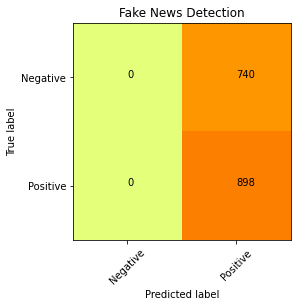

#Tried LSTM with a modified version of the previous paper, didn't get expected results, left for future learning.

made errors in processing the data inputs. Due to lack of time, not resolving bugs.

In [101]:
import numpy as np
import re
import string
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
from gensim import utils
from nltk.corpus import stopwords

In [105]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from collections import Counter
import os
#import getEmbeddings2
import matplotlib.pyplot as plt
#import scikitplot.plotters as skplt

In [106]:
top_words = 5000
epoch_num = 20
batch_size = 64

In [181]:
if not os.path.isfile('./xtr_shuffled.npy') or \
    not os.path.isfile('./xte_shuffled.npy') or \
    not os.path.isfile('./ytr_shuffled.npy') or \
    not os.path.isfile('./yte_shuffled.npy'):
    getEmbeddings('./train_u.csv')

In [182]:
xtr = np.load('./xtr_shuffled.npy',allow_pickle=True)
xte = np.load('./xte_shuffled.npy',allow_pickle=True)
y_train = np.load('./ytr_shuffled.npy',allow_pickle=True)
y_test = np.load('./yte_shuffled.npy',allow_pickle=True)

In [183]:
cnt = Counter()
x_train = []
for x in xtr:
    x_train.append(x.split())
    for word in x_train[-1]:
        cnt[word] += 1  

In [184]:
# Storing most common words
most_common = cnt.most_common(top_words + 1)
word_bank = {}
id_num = 1
for word, freq in most_common:
    word_bank[word] = id_num
    id_num += 1

# Encode the sentences
for news in x_train:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

y_train = list(y_train)
y_test = list(y_test)

In [185]:
# Delete the short news
i = 0
while i < len(x_train):
    if len(x_train[i]) > 10:
        i += 1
    else:
        del x_train[i]
        del y_train[i]

# Generating test data
x_test = []
for x in xte:
    x_test.append(x.split())

# Encode the sentences
for news in x_test:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

In [186]:
# Truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [187]:
X_train.shape

(3350, 500)

In [188]:
y_train.shape

(3350,)

In [189]:
# Create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words+2, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch_num, batch_size=batch_size)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy= %.2f%%" % (scores[1]*100))



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           160064    
                                                                 
 lstm_5 (LSTM)               (None, 100)               53200     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 213,365
Trainable params: 213,365
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
53/53 [==============================] - 5s 44ms/step - loss: 0.6793 - accuracy: 0.5821 - val_loss: 0.6833 - val_accuracy: 0.5635
Epoch 2/20
53/53 [==============================] - 2s 34ms/step - loss: 0.6280 - accuracy: 0.6525 - val_loss: 0.6789 - val_accuracy: 0.5688
Epoch 3/20
53/53 [=======

In [204]:
# Draw the confusion matrix
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
plot_cmat(y_test, y_pred)



ValueError: ignored

In [160]:
y_test

array([ True,  True,  True, ...,  True, False, False])

In [201]:
y_pred=y_pred.astype(int)

In [202]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [199]:
for i in range(y_pred.shape[0]):
  if y_pred[i]<0.5:
    y_pred[i]=0
  else:
    y_pred[i]=1